<a href="https://colab.research.google.com/github/agasthya-karna/mac-lear/blob/main/WaterPotability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SET UP!!**

In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
try:
    import pycaret
except:
    !pip install pycaret-nightly

try:
    import missingno
except:
    !pip install missingno

try:
    import interpret
except:
    !pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 34.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score ,precision_score ,recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
water_df=pd.read_csv('/content/drive/MyDrive/water_potability.csv')
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
water_df.head(6).T.style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

,0,1,2,3,4,5
ph,nan,3.716080,8.099124,8.316766,9.092223,5.584087
Hardness,204.890455,129.422921,224.236259,214.373394,181.101509,188.313324
Solids,20791.318981,18630.057858,19909.541732,22018.417441,17978.986339,28748.687739
Chloramines,7.300212,6.635246,9.275884,8.059332,6.546600,7.544869
Sulfate,368.516441,nan,nan,356.886136,310.135738,326.678363
Conductivity,564.308654,592.885359,418.606213,363.266516,398.410813,280.467916
Organic_carbon,10.379783,15.180013,16.868637,18.436524,11.558279,8.399735
Trihalomethanes,86.990970,56.329076,66.420093,100.341674,31.997993,54.917862
Turbidity,2.963135,4.500656,3.055934,4.628771,4.075075,2.559708
Potability,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# **Checking Missing Values**

<Axes: >

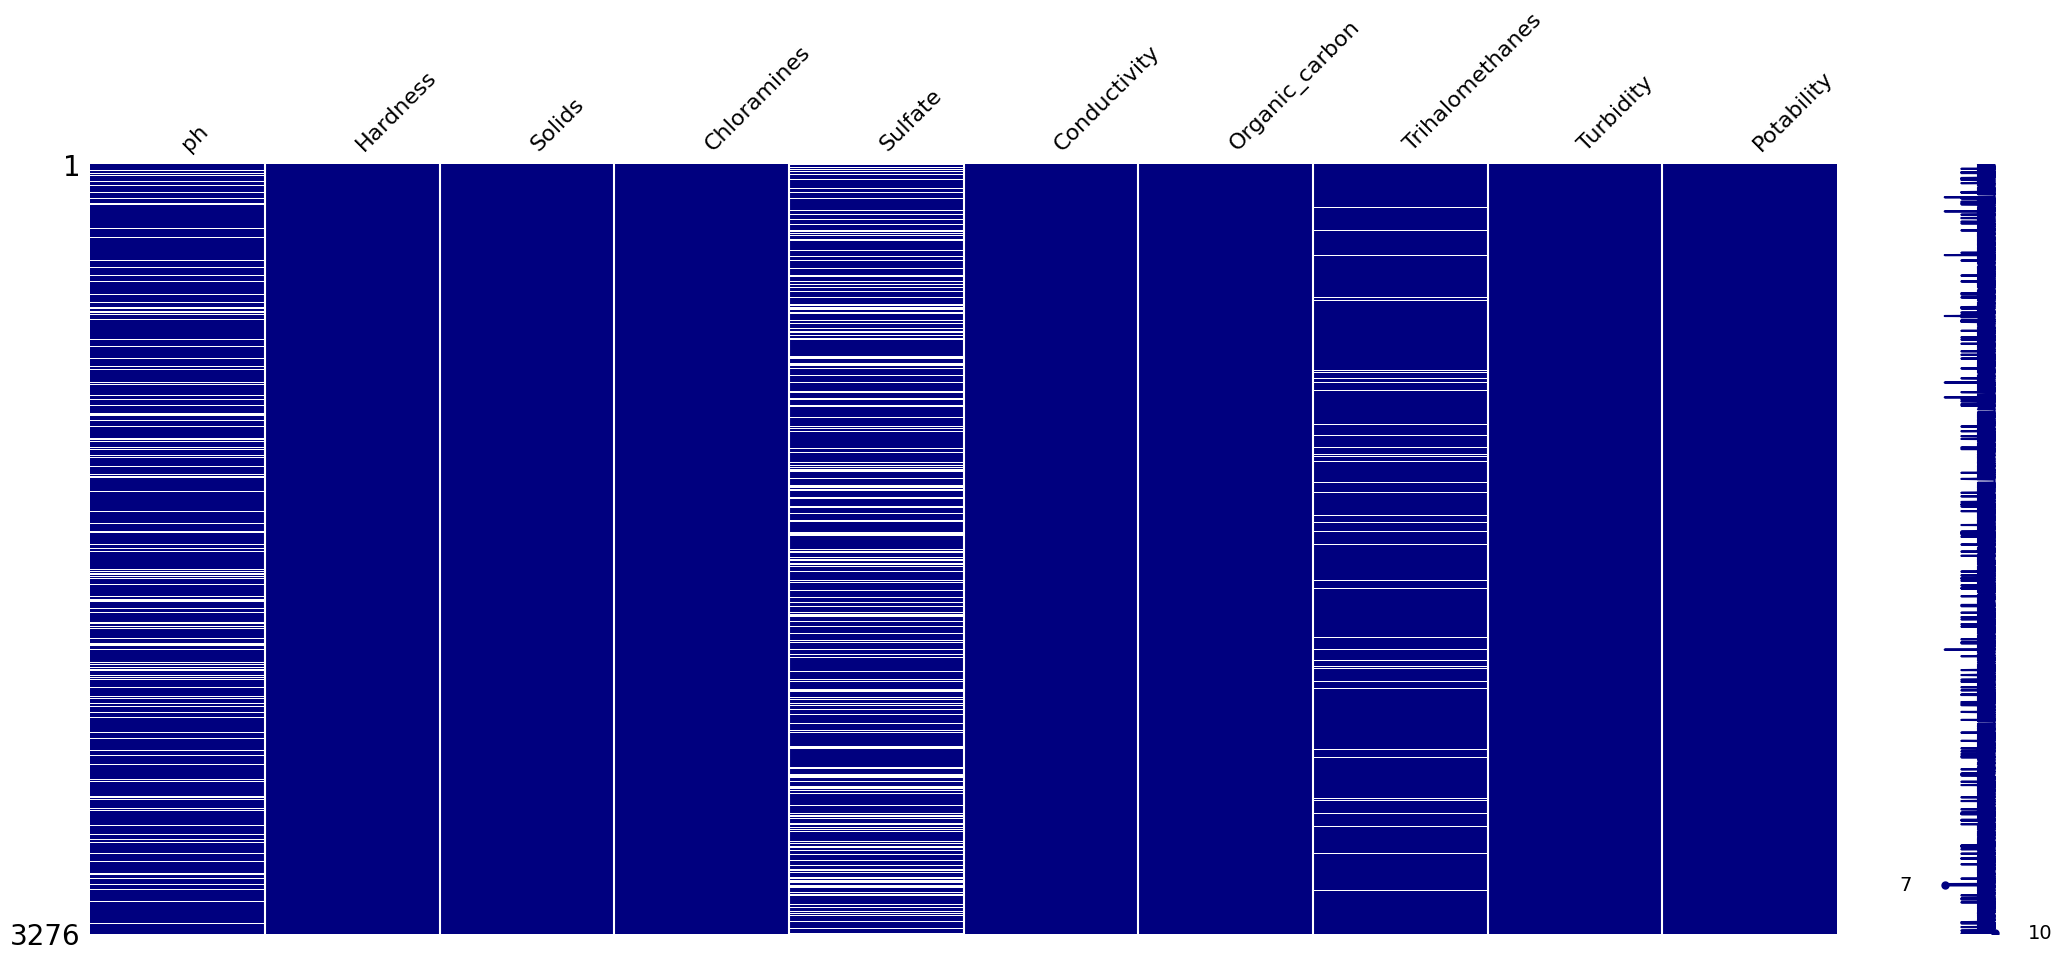

In [7]:
import missingno as msno
msno.matrix(water_df,color=(0.0,0.0,0.5)) ##RGB intensity values

# **Handling Missing Values**

In [8]:
water_df.dropna(axis=0,inplace=True)

# **Anomaly Detection and Removal**

In [9]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 8.0 MB/

In [10]:
from pycaret.utils import version
version()

'3.2.0'

In [11]:
!pip install pycaret[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [13]:
from pycaret.anomaly import *

setup(data=water_df)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a5fe13ed870>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so: cannot open shared object file: No such file or directory


,Description,Value
0,Session id,3819
1,Original data shape,"(2011, 10)"
2,Transformed data shape,"(2011, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [14]:
pca = create_model('pca')


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
pca_df = assign_model(pca)


In [16]:
abnormal_data = pca_df[pca_df.Anomaly == 1].sort_values(by='Anomaly_Score', ascending=False)


In [17]:

print("the size of anomaly = ",len(abnormal_data))
abnormal_data.head(10).style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

the size of anomaly =  101


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Anomaly,Anomaly_Score
1554,8.942046,215.673782,56488.671875,3.231438,129.000000,541.915466,9.313770,70.828377,4.354288,1,1,755.201667
275,5.324942,280.089661,35344.656250,13.043806,180.206741,392.421509,10.504820,55.084667,4.427138,1,1,653.673848
1186,9.484703,122.906990,56351.394531,4.219710,219.553436,480.848053,13.533433,41.731220,4.132274,1,1,635.145061
810,0.989912,133.216934,16922.853516,9.293288,444.375732,322.291199,10.430077,43.578465,5.160604,1,1,624.419470
726,0.227499,152.530106,39028.597656,3.462492,283.693787,443.029236,13.201943,62.322712,3.545741,1,1,595.487218
1106,6.879960,163.593338,44586.812500,2.741712,219.148941,554.045105,16.521942,67.533257,5.688207,1,1,588.521202
351,8.848586,188.919983,32033.332031,13.127000,182.397369,479.791962,12.070444,77.671341,4.014682,1,1,571.630589
3218,5.859822,287.975555,3640.734375,4.072626,391.697388,447.121857,6.363175,49.155289,3.426634,1,1,562.328170
2694,3.676845,173.677704,22581.224609,12.653362,289.126831,599.729248,8.386408,49.658554,5.461473,0,1,560.103853
698,6.246264,163.218033,26408.880859,6.029671,429.022308,509.956879,23.569645,19.175175,5.044455,1,1,559.507633


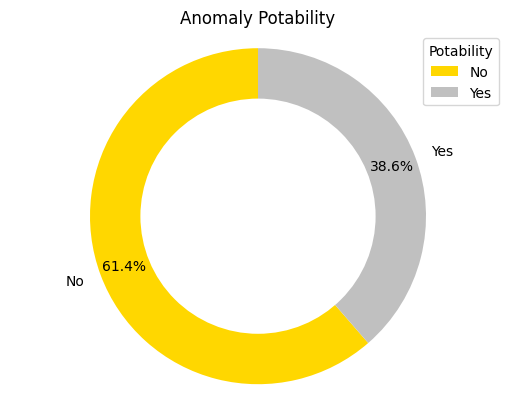

Looking at the target of data judged as anomaly, there are more cases judged as potability.


In [18]:

colors = ['gold', 'silver']
labels = ['No', 'Yes']
#YES=Representing the water is not potable (TRUE)
#NO=Showing that water is potable ,even though the water is not potable (outlier)
values = abnormal_data['Potability'].value_counts() / abnormal_data['Potability'].shape[0]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Title and legend
plt.title("Anomaly Potability")
plt.legend(labels, title="Potability", loc="upper right")

# Show the plot
plt.show()
print('Looking at the target of data judged as anomaly, there are more cases judged as potability.')

In [19]:
water_df.drop(abnormal_data.index,axis=0,inplace=True)

# **Exploratory Data Analysis**

***Data types of features***

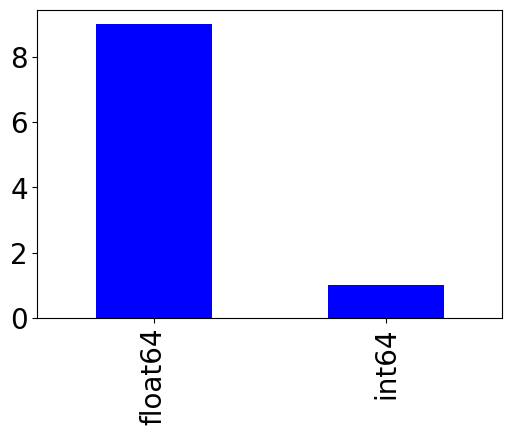

In [20]:
plt.figure(figsize = (6,4))

ax = water_df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='blue')

***Checking Target Imbalance***

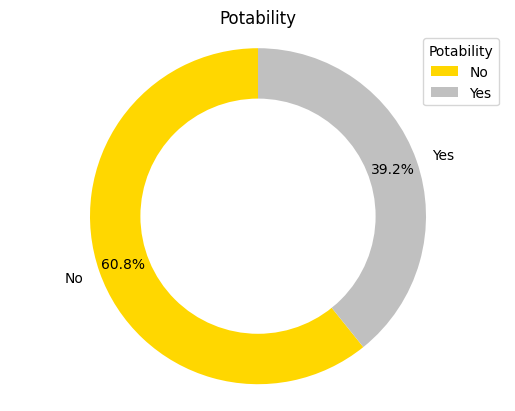

In [21]:

colors = ['gold', 'silver']
labels = ['No', 'Yes']
values = water_df['Potability'].value_counts() / water_df['Potability'].shape[0]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Title and legend
plt.title("Potability")
plt.legend(labels, title="Potability", loc="upper right")

# Show the plot
plt.show()


## **Feature Engineering**

In [22]:
def get_condition(feature):
  q1,q3 = water_df.loc[water_df['Potability']==1,feature].quantile([0.25,0.75])
  print(q1,q3)
  condition = (water_df[feature] >= q1) & (water_df[feature] <= q3)
  return condition

In [23]:
def display_stat(feature):
  mean = water_df[feature].mean()
  std = water_df[feature].std()
  skew = water_df[feature].skew()
  kurtosis = water_df[feature].kurtosis()
  print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

In [24]:
def plot_histgram(feature):
    fig = px.histogram(water_df, x=feature,
                       color="Potability",
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )
    fig.update_layout(
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    )
    fig.show()

# **pH**

In [25]:
plot_histgram('ph')
display_stat('ph')


mean: 7.0805, std: 1.4975, skew: 0.0573, kurtosis: 0.1549 


***Derived Feature ( is_ph_ok )***

In [26]:
condition = get_condition('ph')

6.281903929078816 7.916669698835311


In [27]:
water_df['is_ph_ok'] = 0
water_df.loc[condition, 'is_ph_ok'] = 1
water_df['is_ph_ok'].value_counts()

0    1078
1     832
Name: is_ph_ok, dtype: int64

# **Hardness**

In [28]:
plot_histgram('Hardness')
display_stat('Hardness')

mean: 195.8454, std: 30.3586, skew: -0.1247, kurtosis: 0.2793 


***Derived Feature ( is_Hardness_ok )***

In [29]:
condition = get_condition('Hardness')


175.87029407292718 217.32479950557504


In [30]:
water_df['is_Hardness_ok'] = 0
water_df.loc[condition, 'is_Hardness_ok'] = 1
water_df['is_Hardness_ok'].value_counts()

1    1021
0     889
Name: is_Hardness_ok, dtype: int64

# **Solids**

In [31]:
plot_histgram('Solids')
display_stat('Solids')

mean: 21598.2128, std: 8169.4199, skew: 0.4821, kurtosis: 0.0297 


***Derived Feature ( is_Solids_ok )***

In [32]:
condition = get_condition('Solids')

15736.580985502496 27283.780654727874


In [33]:
water_df['is_Solids_ok'] = 0
water_df.loc[condition, 'is_Solids_ok'] = 1
water_df['is_Solids_ok'].value_counts()

1    978
0    932
Name: is_Solids_ok, dtype: int64

# **Chloramines**

In [34]:
plot_histgram('Chloramines')
display_stat('Chloramines')

mean: 7.1563, std: 1.4861, skew: 0.0086, kurtosis: 0.2503 


***Derived Feature ( is_Chloramines_ok )***

In [35]:
condition = get_condition('Chloramines')


6.18785720964272 8.14664316834556


In [36]:
water_df['is_Chloramines_ok'] = 0
water_df.loc[condition, 'is_Chloramines_ok'] = 1
water_df['is_Chloramines_ok'].value_counts()


1    980
0    930
Name: is_Chloramines_ok, dtype: int64

# **Sulphates**

In [37]:
plot_histgram('Sulfate')
display_stat('Sulfate')

mean: 333.7011, std: 37.9918, skew: 0.0625, kurtosis: 0.1455 


***Derived Feature ( is_Sulfate_ok )***

In [38]:
condition = get_condition('Sulfate')


304.80784540436133 364.1301406497154


In [39]:
water_df['is_Sulfate_ok'] = 0
water_df.loc[condition, 'is_Sulfate_ok'] = 1
water_df['is_Sulfate_ok'].value_counts()

1    1092
0     818
Name: is_Sulfate_ok, dtype: int64

# **Conductivity**

In [40]:
plot_histgram('Conductivity')
display_stat('Conductivity')

mean: 425.6764, std: 79.6940, skew: 0.2168, kurtosis: -0.3840 


***Derived Feature ( is_Conductivity_ok )***

In [41]:
condition = get_condition('Conductivity')


359.4609502338278 482.63717983915575


In [42]:
water_df['is_Conductivity_ok'] = 0
water_df.loc[condition, 'is_Conductivity_ok'] = 1
water_df['is_Conductivity_ok'].value_counts()

1    1008
0     902
Name: is_Conductivity_ok, dtype: int64

# **Organic_carbon**


In [43]:
plot_histgram('Organic_carbon')
display_stat('Organic_carbon')

mean: 14.3985, std: 3.2504, skew: -0.0093, kurtosis: -0.1181 


***Derived Feature ( is_Organic_carbon_ok )***

In [44]:
condition = get_condition('Organic_carbon')


12.287824431743331 16.618052779485254


In [45]:
water_df['is_Organic_carbon_ok'] = 0
water_df.loc[condition, 'is_Organic_carbon_ok'] = 1
water_df['is_Organic_carbon_ok'].value_counts()

0    981
1    929
Name: is_Organic_carbon_ok, dtype: int64

# **Trihalomethanes**

In [46]:
plot_histgram('Trihalomethanes')
display_stat('Trihalomethanes')

mean: 66.4535, std: 15.9418, skew: -0.0286, kurtosis: 0.1671 


***Derived Feature ( is_Trihalomethanes_ok )***

In [47]:
condition = get_condition('Trihalomethanes')


56.40970791971599 77.55495328187686


In [48]:
water_df['is_Trihalomethanes_ok'] = 0
water_df.loc[condition, 'is_Trihalomethanes_ok'] = 1
water_df['is_Trihalomethanes_ok'].value_counts()

1    960
0    950
Name: is_Trihalomethanes_ok, dtype: int64

# **Turbidity**

In [49]:
plot_histgram('Turbidity')
display_stat('Turbidity')

mean: 3.9729, std: 0.7590, skew: -0.0415, kurtosis: -0.1139 


***Derived Feature ( is_Turbidity_ok )***

In [50]:
condition = get_condition('Turbidity')


3.4780048078684977 4.531920781408072


In [51]:
water_df['is_Turbidity_ok'] = 0
water_df.loc[condition, 'is_Turbidity_ok'] = 1
water_df['is_Turbidity_ok'].value_counts()

1    970
0    940
Name: is_Turbidity_ok, dtype: int64

# **Checking Feature Importance**

<Figure size 3000x3000 with 0 Axes>

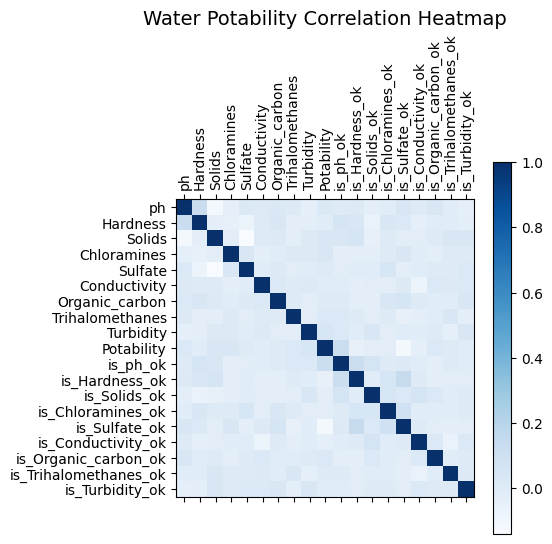

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = water_df.corr().round(2)

# Set up the figure
plt.figure(figsize=(30, 30))

# Create a heatmap
cax = plt.matshow(corr, cmap='Blues')
plt.colorbar(cax)

# Set axis labels and titles
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title("Water Potability Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()


<Figure size 400x200 with 0 Axes>

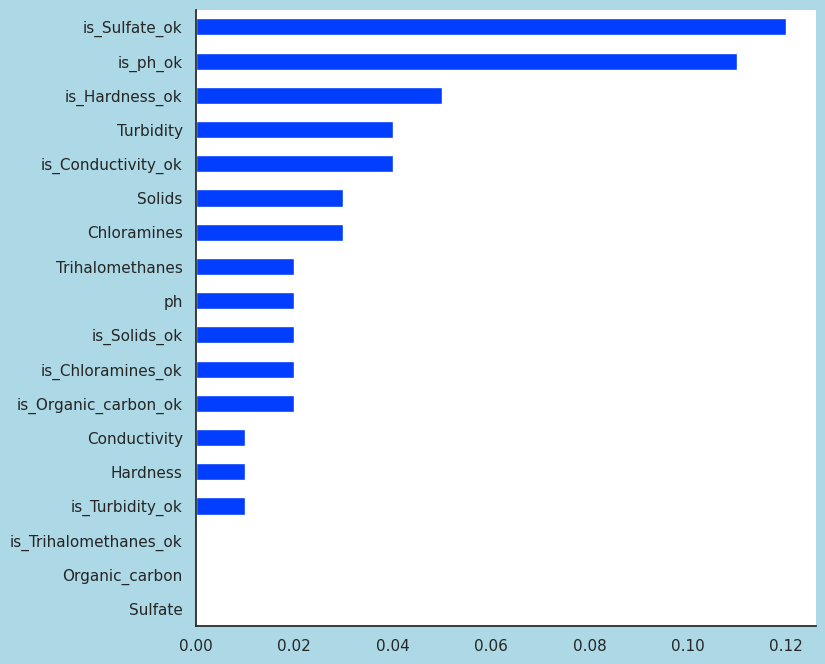

In [53]:
sns.set(font_scale=1)
plt.figure(figsize=(4,2))
sns.set_style("white")
sns.set_palette("bright")
plt.rcParams['figure.facecolor'] = 'lightblue'
fig,ax = plt.subplots(figsize=(8,8))
abs(corr['Potability']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
sns.despine()

In [54]:
water_df_copy = water_df.copy()
X_train = water_df_copy.drop('Potability',axis=1)
y_train = water_df_copy.pop('Potability')

In [55]:
all_cols = [cname for cname in X_train.columns]


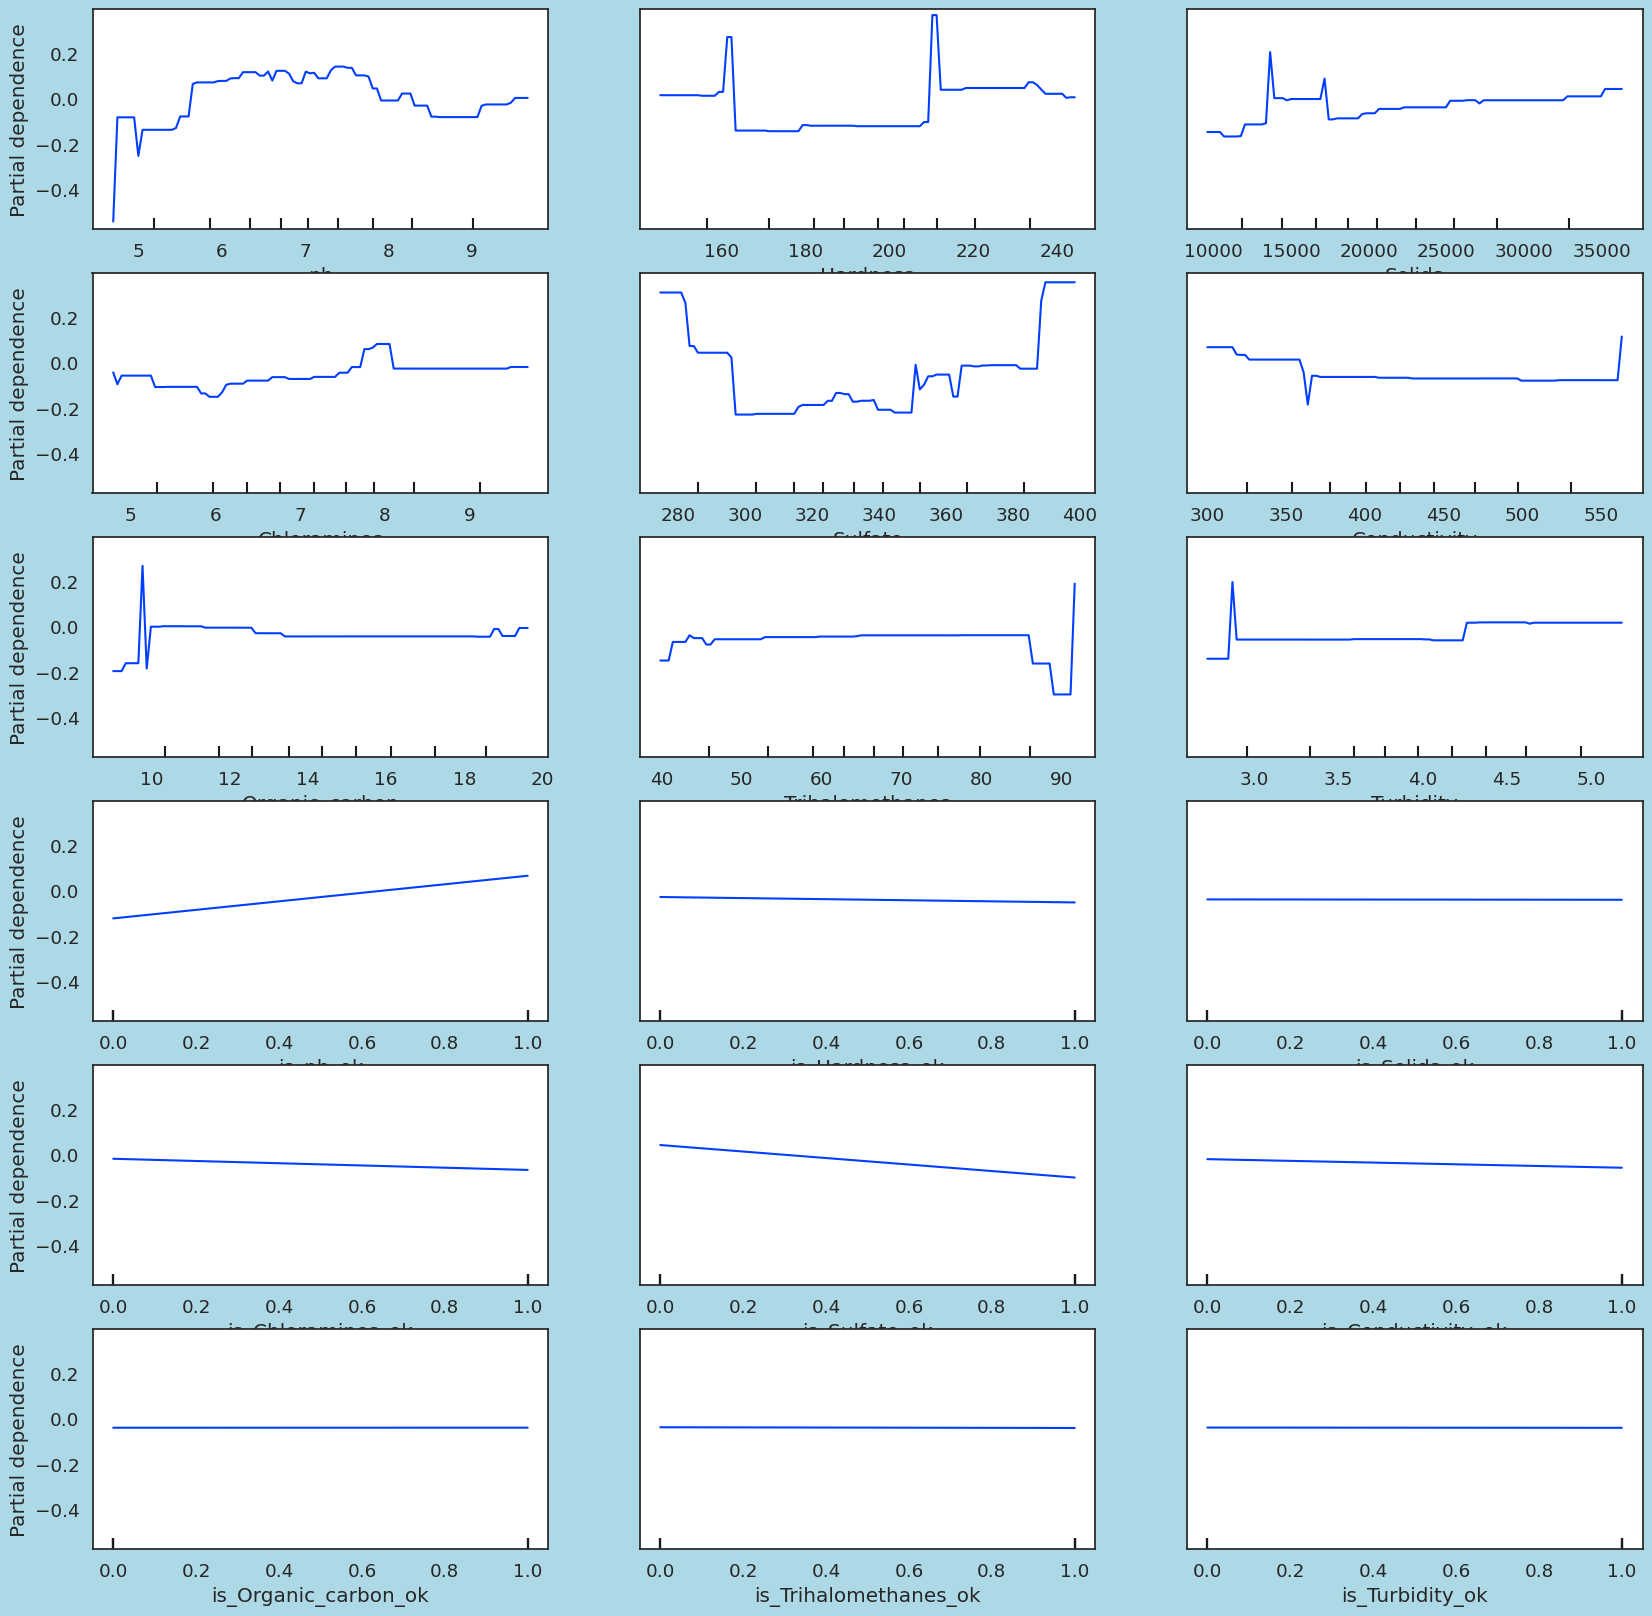

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

clf = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("bright")
plt.rcParams['figure.facecolor'] = 'lightblue'
fig,ax = plt.subplots(figsize=(20,20))
PartialDependenceDisplay.from_estimator(clf, X_train, all_cols, ax=ax)

# **Modelling**

In [57]:
!!pip install --pre pycaret
from pycaret.classification import *


In [58]:
setup(data = water_df,
             target = 'Potability',
             preprocess = False,
             numeric_features = all_cols,
             )

,Description,Value
0,Session id,6093
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(1910, 19)"
4,Transformed data shape,"(1910, 19)"
5,Transformed train set shape,"(1337, 19)"
6,Transformed test set shape,"(573, 19)"
7,Numeric features,18


In [59]:
top5 = compare_models(sort='Recall',n_select = 5,exclude=['ridge','svm','dummy','knn','qda','ada','xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5813,0.5606,0.4642,0.4669,0.4643,0.1214,0.1217,0.0520
lightgbm,Light Gradient Boosting Machine,0.6657,0.6755,0.4638,0.5939,0.5205,0.2700,0.2750,1.0360
catboost,CatBoost Classifier,0.6672,0.7050,0.3931,0.6219,0.4803,0.2535,0.2688,6.2030
gbc,Gradient Boosting Classifier,0.6440,0.6543,0.3452,0.5804,0.4316,0.1958,0.2108,0.9350
rf,Random Forest Classifier,0.6560,0.6662,0.3399,0.6157,0.4347,0.2166,0.2378,0.8450
et,Extra Trees Classifier,0.6201,0.6208,0.3282,0.5362,0.4045,0.1472,0.1593,0.6680
nb,Naive Bayes,0.6148,0.6201,0.3228,0.5141,0.3935,0.1345,0.1428,0.0420
lda,Linear Discriminant Analysis,0.6125,0.5922,0.2386,0.5140,0.3228,0.1016,0.1169,0.0500
lr,Logistic Regression,0.6096,0.5391,0.0511,0.1556,0.0755,0.0228,0.0292,1.3700


Processing:   0%|          | 0/45 [00:00<?, ?it/s]

# **Creating Models**
This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold.

In [63]:
dt = create_model('dt')
rf = create_model('rf')
lightgbm = create_model('lightgbm')
et = create_model('et')
catboost = create_model('catboost')
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6119,0.5910,0.4906,0.5098,0.5000,0.1831,0.1832
1,0.5448,0.5093,0.3396,0.4091,0.3711,0.0192,0.0194
2,0.4925,0.4726,0.3774,0.3636,0.3704,-0.0544,-0.0544
3,0.5522,0.5253,0.3962,0.4286,0.4118,0.0512,0.0513
4,0.6045,0.5854,0.5000,0.4906,0.4952,0.1701,0.1702
5,0.5149,0.5087,0.4808,0.3968,0.4348,0.0167,0.0169
6,0.5597,0.5382,0.4423,0.4340,0.4381,0.0762,0.0762
7,0.6391,0.6280,0.5769,0.5357,0.5556,0.2525,0.2530
8,0.6391,0.6073,0.4615,0.5455,0.5000,0.2207,0.2226


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5896,0.5800,0.2830,0.4688,0.3529,0.0785,0.0839
1,0.6493,0.6454,0.3396,0.6000,0.4337,0.2070,0.2246
2,0.6493,0.6841,0.3208,0.6071,0.4198,0.2014,0.2224
3,0.6119,0.6560,0.2830,0.5172,0.3659,0.1195,0.1308
4,0.6866,0.7094,0.2692,0.7778,0.4000,0.2504,0.3150
5,0.6194,0.5985,0.2692,0.5185,0.3544,0.1214,0.1345
6,0.6642,0.6446,0.3462,0.6207,0.4444,0.2307,0.2509
7,0.6692,0.7145,0.4423,0.6053,0.5111,0.2701,0.2777
8,0.6992,0.6955,0.3846,0.7143,0.5000,0.3116,0.3421


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6343,0.6536,0.4340,0.5476,0.4842,0.2068,0.2102
1,0.6343,0.6122,0.3962,0.5526,0.4615,0.1959,0.2022
2,0.7090,0.7410,0.5283,0.6667,0.5895,0.3687,0.3747
3,0.6642,0.6618,0.4906,0.5909,0.5361,0.2765,0.2794
4,0.6791,0.6740,0.4808,0.6098,0.5376,0.2971,0.3021
5,0.6119,0.6717,0.3846,0.5000,0.4348,0.1469,0.1498
6,0.6493,0.6292,0.4231,0.5641,0.4835,0.2261,0.2315
7,0.6692,0.6823,0.5000,0.5909,0.5417,0.2856,0.2881
8,0.7068,0.7229,0.5192,0.6585,0.5806,0.3600,0.3660


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5821,0.5510,0.2642,0.4516,0.3333,0.0585,0.0629
1,0.5299,0.5140,0.3019,0.3810,0.3368,-0.0198,-0.0201
2,0.6716,0.6918,0.3585,0.6552,0.4634,0.2550,0.2791
3,0.6716,0.6335,0.4151,0.6286,0.5000,0.2705,0.2834
4,0.6642,0.6741,0.3654,0.6129,0.4578,0.2365,0.2531
5,0.5522,0.5383,0.3077,0.4000,0.3478,0.0157,0.0160
6,0.6269,0.6551,0.3269,0.5312,0.4048,0.1549,0.1646
7,0.6466,0.6740,0.3077,0.5926,0.4051,0.1881,0.2085
8,0.6090,0.6113,0.3654,0.5000,0.4222,0.1374,0.1413


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6493,0.6727,0.4528,0.5714,0.5053,0.2392,0.2431
1,0.6642,0.6322,0.3208,0.6538,0.4304,0.2299,0.2592
2,0.7090,0.7633,0.4340,0.7188,0.5412,0.3466,0.3703
3,0.6418,0.7063,0.3585,0.5758,0.4419,0.1986,0.2107
4,0.6940,0.7181,0.4231,0.6667,0.5176,0.3096,0.3268
5,0.6194,0.6846,0.3462,0.5143,0.4138,0.1477,0.1540
6,0.6194,0.6834,0.3269,0.5152,0.4000,0.1412,0.1491
7,0.6767,0.7047,0.4231,0.6286,0.5057,0.2789,0.2910
8,0.6917,0.7405,0.4038,0.6774,0.5060,0.3022,0.3236


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6119,0.5784,0.3396,0.5143,0.4091,0.1378,0.1444
1,0.6642,0.6226,0.3962,0.6176,0.4828,0.2513,0.2649
2,0.6866,0.7209,0.3585,0.7037,0.4750,0.2838,0.3166
3,0.6493,0.6830,0.3774,0.5882,0.4598,0.2180,0.2298
4,0.6716,0.6932,0.3269,0.6538,0.4359,0.2390,0.2676
5,0.6418,0.6766,0.3462,0.5625,0.4286,0.1887,0.2005
6,0.6119,0.5823,0.2885,0.5000,0.3659,0.1144,0.1234
7,0.6241,0.6422,0.3846,0.5263,0.4444,0.1706,0.1754
8,0.6165,0.6425,0.2885,0.5172,0.3704,0.1256,0.1366


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6119,0.5910,0.4906,0.5098,0.5000,0.1831,0.1832
1,0.5448,0.5093,0.3396,0.4091,0.3711,0.0192,0.0194
2,0.4925,0.4726,0.3774,0.3636,0.3704,-0.0544,-0.0544
3,0.5522,0.5253,0.3962,0.4286,0.4118,0.0512,0.0513
4,0.6045,0.5854,0.5000,0.4906,0.4952,0.1701,0.1702
5,0.5149,0.5087,0.4808,0.3968,0.4348,0.0167,0.0169
6,0.5597,0.5382,0.4423,0.4340,0.4381,0.0762,0.0762
7,0.6391,0.6280,0.5769,0.5357,0.5556,0.2525,0.2530
8,0.6391,0.6073,0.4615,0.5455,0.5000,0.2207,0.2226


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5896,0.5800,0.2830,0.4688,0.3529,0.0785,0.0839
1,0.6493,0.6454,0.3396,0.6000,0.4337,0.2070,0.2246
2,0.6493,0.6841,0.3208,0.6071,0.4198,0.2014,0.2224
3,0.6119,0.6560,0.2830,0.5172,0.3659,0.1195,0.1308
4,0.6866,0.7094,0.2692,0.7778,0.4000,0.2504,0.3150
5,0.6194,0.5985,0.2692,0.5185,0.3544,0.1214,0.1345
6,0.6642,0.6446,0.3462,0.6207,0.4444,0.2307,0.2509
7,0.6692,0.7145,0.4423,0.6053,0.5111,0.2701,0.2777
8,0.6992,0.6955,0.3846,0.7143,0.5000,0.3116,0.3421


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6343,0.6536,0.4340,0.5476,0.4842,0.2068,0.2102
1,0.6343,0.6122,0.3962,0.5526,0.4615,0.1959,0.2022
2,0.7090,0.7410,0.5283,0.6667,0.5895,0.3687,0.3747
3,0.6642,0.6618,0.4906,0.5909,0.5361,0.2765,0.2794
4,0.6791,0.6740,0.4808,0.6098,0.5376,0.2971,0.3021
5,0.6119,0.6717,0.3846,0.5000,0.4348,0.1469,0.1498
6,0.6493,0.6292,0.4231,0.5641,0.4835,0.2261,0.2315
7,0.6692,0.6823,0.5000,0.5909,0.5417,0.2856,0.2881
8,0.7068,0.7229,0.5192,0.6585,0.5806,0.3600,0.3660


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5821,0.5510,0.2642,0.4516,0.3333,0.0585,0.0629
1,0.5299,0.5140,0.3019,0.3810,0.3368,-0.0198,-0.0201
2,0.6716,0.6918,0.3585,0.6552,0.4634,0.2550,0.2791
3,0.6716,0.6335,0.4151,0.6286,0.5000,0.2705,0.2834
4,0.6642,0.6741,0.3654,0.6129,0.4578,0.2365,0.2531
5,0.5522,0.5383,0.3077,0.4000,0.3478,0.0157,0.0160
6,0.6269,0.6551,0.3269,0.5312,0.4048,0.1549,0.1646
7,0.6466,0.6740,0.3077,0.5926,0.4051,0.1881,0.2085
8,0.6090,0.6113,0.3654,0.5000,0.4222,0.1374,0.1413


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6493,0.6727,0.4528,0.5714,0.5053,0.2392,0.2431
1,0.6642,0.6322,0.3208,0.6538,0.4304,0.2299,0.2592
2,0.7090,0.7633,0.4340,0.7188,0.5412,0.3466,0.3703
3,0.6418,0.7063,0.3585,0.5758,0.4419,0.1986,0.2107
4,0.6940,0.7181,0.4231,0.6667,0.5176,0.3096,0.3268
5,0.6194,0.6846,0.3462,0.5143,0.4138,0.1477,0.1540
6,0.6194,0.6834,0.3269,0.5152,0.4000,0.1412,0.1491
7,0.6767,0.7047,0.4231,0.6286,0.5057,0.2789,0.2910
8,0.6917,0.7405,0.4038,0.6774,0.5060,0.3022,0.3236


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6119,0.5784,0.3396,0.5143,0.4091,0.1378,0.1444
1,0.6642,0.6226,0.3962,0.6176,0.4828,0.2513,0.2649
2,0.6866,0.7209,0.3585,0.7037,0.4750,0.2838,0.3166
3,0.6493,0.6830,0.3774,0.5882,0.4598,0.2180,0.2298
4,0.6716,0.6932,0.3269,0.6538,0.4359,0.2390,0.2676
5,0.6418,0.6766,0.3462,0.5625,0.4286,0.1887,0.2005
6,0.6119,0.5823,0.2885,0.5000,0.3659,0.1144,0.1234
7,0.6241,0.6422,0.3846,0.5263,0.4444,0.1706,0.1754
8,0.6165,0.6425,0.2885,0.5172,0.3704,0.1256,0.1366


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **HyperParameter Tuning**

In [64]:
tuned_rf=tune_model(rf,optimize='recall',early_stopping=True)
tuned_lightgbm = tune_model(lightgbm, optimize = 'Recall', early_stopping=True)
tuned_et = tune_model(et, optimize = 'Recall', early_stopping=True)
tuned_catboost = tune_model(catboost, optimize = 'Recall', early_stopping=True)
tuned_gbc = tune_model(gbc, optimize = 'Recall', early_stopping=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6045,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.3955,0.5000,1.0000,0.3955,0.5668,0.0000,0.0000
2,0.3955,0.5000,1.0000,0.3955,0.5668,0.0000,0.0000
3,0.3955,0.5000,1.0000,0.3955,0.5668,0.0000,0.0000
4,0.3881,0.5000,1.0000,0.3881,0.5591,0.0000,0.0000
5,0.3881,0.5000,1.0000,0.3881,0.5591,0.0000,0.0000
6,0.3881,0.5000,1.0000,0.3881,0.5591,0.0000,0.0000
7,0.3910,0.5000,1.0000,0.3910,0.5622,0.0000,0.0000
8,0.3910,0.5000,1.0000,0.3910,0.5622,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6045,0.5837,0.4340,0.5000,0.4646,0.1535,0.1545
1,0.5746,0.5807,0.3396,0.4500,0.3871,0.0710,0.0727
2,0.6493,0.7137,0.4340,0.5750,0.4946,0.2340,0.2394
3,0.6866,0.6606,0.5094,0.6279,0.5625,0.3224,0.3267
4,0.6119,0.6522,0.4038,0.5000,0.4468,0.1531,0.1552
5,0.5672,0.6135,0.3077,0.4211,0.3556,0.0414,0.0426
6,0.6045,0.5804,0.3077,0.4848,0.3765,0.1076,0.1135
7,0.5865,0.6147,0.4423,0.4694,0.4554,0.1226,0.1227
8,0.6015,0.6432,0.4808,0.4902,0.4854,0.1603,0.1604


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:01:58
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6045,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.3955,0.5000,1.0000,0.3955,0.5668,0.0000,0.0000
2,0.3955,0.5000,1.0000,0.3955,0.5668,0.0000,0.0000
3,0.3955,0.5000,1.0000,0.3955,0.5668,0.0000,0.0000
4,0.3881,0.5000,1.0000,0.3881,0.5591,0.0000,0.0000
5,0.3881,0.5000,1.0000,0.3881,0.5591,0.0000,0.0000
6,0.3881,0.5000,1.0000,0.3881,0.5591,0.0000,0.0000
7,0.3910,0.5000,1.0000,0.3910,0.5622,0.0000,0.0000
8,0.3910,0.5000,1.0000,0.3910,0.5622,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6418,0.6648,0.4528,0.5581,0.5000,0.2256,0.2286
1,0.6194,0.6047,0.3774,0.5263,0.4396,0.1631,0.1683
2,0.7313,0.7536,0.5472,0.7073,0.6170,0.4153,0.4234
3,0.6343,0.6569,0.3962,0.5526,0.4615,0.1959,0.2022
4,0.7239,0.6996,0.5192,0.6923,0.5934,0.3908,0.4000
5,0.6716,0.6890,0.4423,0.6053,0.5111,0.2728,0.2804
6,0.6642,0.6424,0.4423,0.5897,0.5055,0.2590,0.2652
7,0.6992,0.7013,0.4423,0.6765,0.5349,0.3268,0.3429
8,0.6617,0.6572,0.4615,0.5854,0.5161,0.2616,0.2659


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5672,0.5625,0.4528,0.4528,0.4528,0.0948,0.0948
1,0.5522,0.5197,0.3774,0.4255,0.4000,0.0449,0.0451
2,0.5970,0.6143,0.4717,0.4902,0.4808,0.1517,0.1518
3,0.5896,0.6327,0.4717,0.4808,0.4762,0.1388,0.1388
4,0.6194,0.5985,0.4231,0.5116,0.4632,0.1724,0.1743
5,0.5597,0.5701,0.4423,0.4340,0.4381,0.0762,0.0762
6,0.6343,0.6135,0.4423,0.5349,0.4842,0.2049,0.2071
7,0.6015,0.6275,0.5385,0.4912,0.5138,0.1774,0.1779
8,0.6316,0.6296,0.4423,0.5349,0.4842,0.2016,0.2038


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Intrepreting Models**

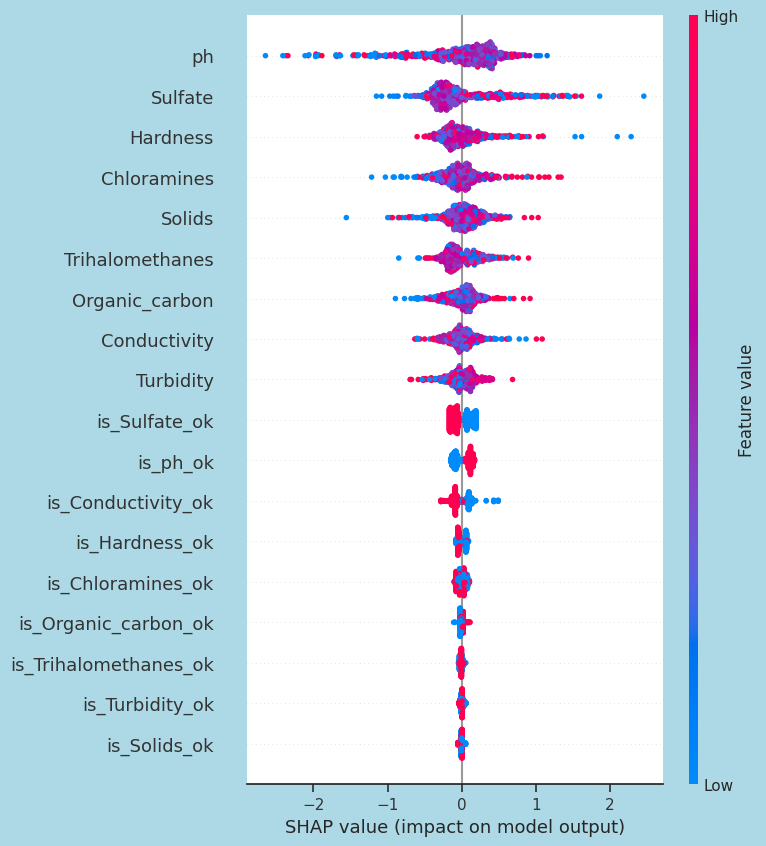

In [65]:
plt.figure(figsize=(8, 6))
interpret_model(tuned_catboost)


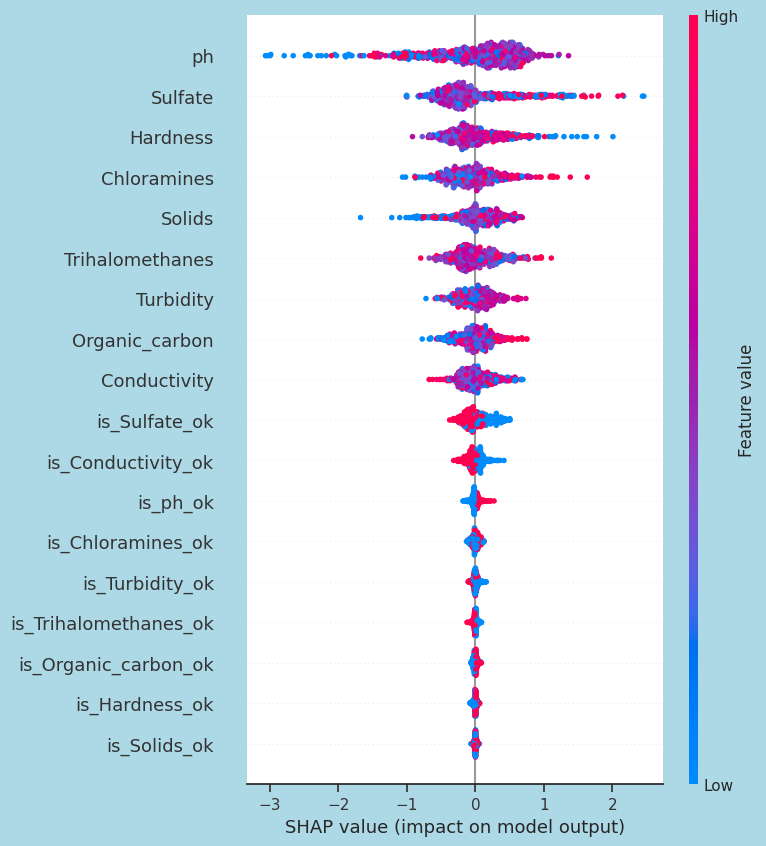

In [66]:
interpret_model(tuned_lightgbm)


In [67]:
interpret_model(catboost,plot='pdp',feature='ph')


In [68]:
interpret_model(catboost,plot='pdp',feature='Sulfate')


In [69]:
interpret_model(catboost,plot='pdp',feature='Hardness')


In [70]:
interpret_model(catboost,plot='pdp',feature='Solids')


In [71]:
interpret_model(catboost,plot='pdp',feature='Conductivity')


In [72]:
interpret_model(catboost,plot='pdp',feature='Organic_carbon')

In [73]:
interpret_model(catboost,plot='pdp',feature='Trihalomethanes')


In [74]:
interpret_model(catboost,plot='pdp',feature='Turbidity')


In [75]:
import tensorflow as tf
import numpy as np

# Assuming you have trained models rf, lightgbm, et, catboost, and gbc

# Load and preprocess your data
# X_train, y_train = ...

# Make predictions using each model
rf_predictions = rf.predict(X_train)
lightgbm_predictions = lightgbm.predict(X_train)
et_predictions = et.predict(X_train)
catboost_predictions = catboost.predict(X_train)
gbc_predictions = gbc.predict(X_train)

# Combine predictions using a custom blending strategy (e.g., soft voting)
predictions = (rf_predictions + lightgbm_predictions + et_predictions + catboost_predictions + gbc_predictions) / 5.0

# Convert predictions to class labels (assuming binary classification)
threshold = 0.5
blended_predictions = np.where(predictions > threshold, 1, 0)




In [76]:
from sklearn.metrics import accuracy_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
accuracy = accuracy_score(y_train, blended_predictions)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8963350785340314


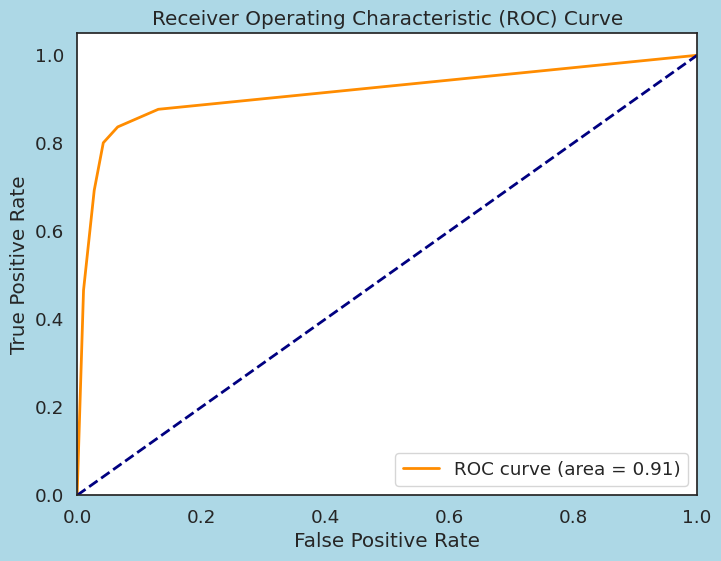

AUC Score: 0.9141893469213616


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve for the blended model
fpr, tpr, thresholds = roc_curve(y_train, predictions)

# Calculate the AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print("AUC Score:", roc_auc)


In [78]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix for the blended model
confusion = confusion_matrix(y_train, blended_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Calculate other classification metrics like precision, recall, F1-score, etc.
report = classification_report(y_train, blended_predictions)

# Print the classification report
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[1112   49]
 [ 149  600]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1161
           1       0.92      0.80      0.86       749

    accuracy                           0.90      1910
   macro avg       0.90      0.88      0.89      1910
weighted avg       0.90      0.90      0.89      1910



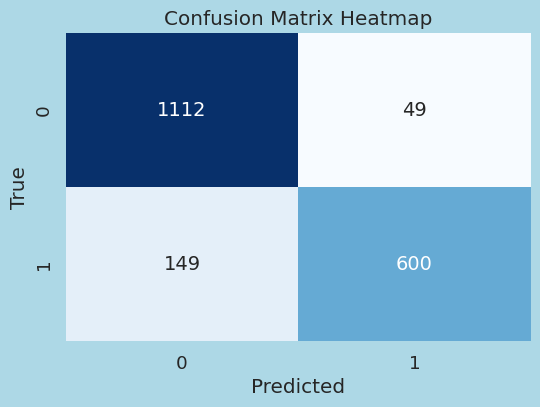

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for the blended model
confusion = confusion_matrix(y_train, blended_predictions)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()
